# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

### Import Libraries

In [0]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder




### Load Data

In [0]:
income_df = "https://github.com/pierretd/UCI-Data-Analysis/blob/master/Adult%20Dataset/Adult/adult.data?raw=true"

income_df = pd.read_csv(income_df,header=None)



### Rename Columns

In [0]:
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status"\
,"occupation","relationship","race","sex","capital-gain","captial-loss","hours-per-week"\
,"native-country","salary"]

income_df.columns = column_names

### Data Cleaning

In [29]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploratory Data Analysis

### One Hot Encode

In [0]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders



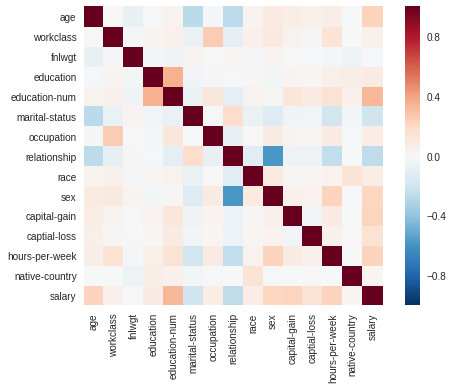

In [31]:
# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(income_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [32]:
encoded_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


### Doublechecking Validity

In [33]:
encoded_data.isnull().sum() == 0

age               True
workclass         True
fnlwgt            True
education         True
education-num     True
marital-status    True
occupation        True
relationship      True
race              True
sex               True
capital-gain      True
captial-loss      True
hours-per-week    True
native-country    True
salary            True
dtype: bool

In [34]:
encoded_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
captial-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [35]:
income_df.describe() #Old

,age,fnlwgt,education-num,capital-gain,captial-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
encoded_data.describe() #New

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [37]:
income_df.shape #Hmm, website says 14 attributes, we have 14 plus target. It also lists more obsevations, but we are only using the training data.

(32561, 15)

In [38]:
encoded_data.shape #same shape as pre-transform!

(32561, 15)

In [0]:
encoded_data, encoders = number_encode_features(income_df)
new_series = encoded_data["salary"]

### Test Train split

In [40]:
#We can create a split from the training data
X_train, X_test, y_train, y_test = train_test_split(encoded_data[encoded_data.columns.drop("salary")], new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [41]:
# logistic regression
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
print(accuracy_score(y_test, y_pred)) #82 percent with a vanilla model, not bad!

0.8214760978605794


In [0]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [44]:
print(fit_and_evaluate(cls))

0.17852390213942063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Coefficients

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'captial-loss', 'hours-per-week', 'native-country'],
      dtype='object')


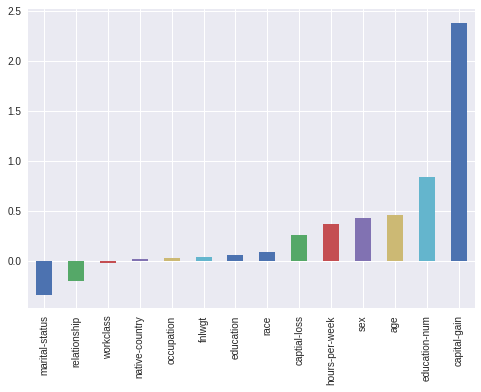

capital-gain      2.381146
education-num     0.836643
age               0.465150
sex               0.430940
hours-per-week    0.365527
captial-loss      0.256219
race              0.087411
education         0.063020
fnlwgt            0.037071
occupation        0.034256
native-country    0.019070
workclass        -0.017224
relationship     -0.200251
marital-status   -0.336773
dtype: float64


In [0]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print( coefs.sort_values(ascending = False))

### Further methods to improve model

In [45]:
# Copy the original data
features = income_df.copy()

# Select the numeric columns
numeric_subset = income_df.select_dtypes('number')
categorical_subset = income_df.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("salary")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(features.head())

   age  fnlwgt  education-num  capital-gain  captial-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_ 0  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked             ...              \
0                        0             ...               
1                        0    

In [46]:
# Replace the inf with nan
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
features = features.dropna()

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(features, new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [47]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print( accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8500358276179752


In [48]:
print(fit_and_evaluate(cls))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.14996417238202478


In [49]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print( coefs.sort_values(ascending = False))

capital-gain                                  2.267280
marital-status_ Married-civ-spouse            0.726389
hours-per-week                                0.396071
education-num                                 0.374957
age                                           0.350717
captial-loss                                  0.270379
relationship_ Wife                            0.268873
occupation_ Exec-managerial                   0.242074
sex_ Male                                     0.192690
occupation_ Prof-specialty                    0.168610
education_ Bachelors                          0.153161
education_ Masters                            0.131674
education_ Prof-school                        0.129115
occupation_ Tech-support                      0.120019
workclass_ Federal-gov                        0.115312
relationship_ Not-in-family                   0.113098
relationship_ Unmarried                       0.108619
education_ Doctorate                          0.101671
native-cou

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'captial-loss',
       'hours-per-week', 'workclass_ 0', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)


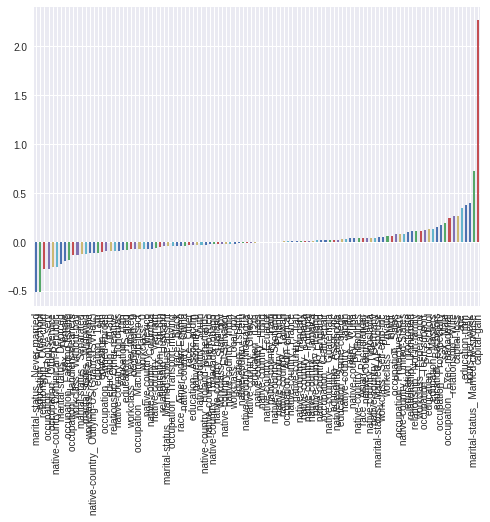

capital-gain                                  2.267280
marital-status_ Married-civ-spouse            0.726389
hours-per-week                                0.396071
education-num                                 0.374957
age                                           0.350717
captial-loss                                  0.270379
relationship_ Wife                            0.268873
occupation_ Exec-managerial                   0.242074
sex_ Male                                     0.192690
occupation_ Prof-specialty                    0.168610
education_ Bachelors                          0.153161
education_ Masters                            0.131674
education_ Prof-school                        0.129115
occupation_ Tech-support                      0.120019
workclass_ Federal-gov                        0.115312
relationship_ Not-in-family                   0.113098
relationship_ Unmarried                       0.108619
education_ Doctorate                          0.101671
native-cou

In [50]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print( coefs.sort_values(ascending = False))

Too many variables, useless plot.

In [0]:
age_group = []
for age in income_df["age"]:
    if age < 25:
        age_group.append("<25")
    elif 25 <= age <= 34:
        age_group.append("25-34")
    elif 34 < age <= 44:
        age_group.append("35-44")
    elif 44 < age <= 54:
        age_group.append("45-54")
    elif 54 < age <= 65:
        age_group.append("55-64")
    else:
        age_group.append("65 and over")

In [52]:
new_income_df = income_df.copy()
new_income_df["age_group"] = age_group
del new_income_df["age"]

# Same thing for "hours-per-week"
work_hours_per_week = []
for hours in income_df["hours-per-week"]:
    if hours < 16:
        work_hours_per_week.append("<16")
    elif 16 <= hours <= 32:
        work_hours_per_week.append("16-32")
    elif 32 < hours <= 48:
        work_hours_per_week.append("32-48")
    elif 48 < hours <= 60:
        work_hours_per_week.append("48-60")
    else:
        work_hours_per_week.append("60 and over")
        
new_income_df["work_hours_per_week"] = work_hours_per_week
del new_income_df["hours-per-week"]

new_income_df.head(1)

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,native-country,salary,age_group,work_hours_per_week
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K,35-44,32-48


In [53]:
# Select the numeric columns
numeric_subset = new_income_df.select_dtypes('number')
categorical_subset = new_income_df.select_dtypes('object')

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("salary")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print (features.head())

   fnlwgt  education-num  capital-gain  captial-loss  workclass_ 0  \
0   77516             13          2174             0             0   
1   83311             13             0             0             0   
2  215646              9             0             0             0   
3  234721              7             0             0             0   
4  338409             13             0             0             0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  workclass_ Self-emp-inc           ...             \
0                   0                        0 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
cls.fit(X_train, y_train)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print (coefs.sort_values(ascending = False))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


capital-gain                                  2.410396
marital-status_ Married-civ-spouse            0.673647
education-num                                 0.347192
age_group_45-54                               0.292424
captial-loss                                  0.272900
relationship_ Wife                            0.271060
occupation_ Exec-managerial                   0.256740
work_hours_per_week_48-60                     0.213582
sex_ Male                                     0.208990
age_group_35-44                               0.195682
occupation_ Prof-specialty                    0.172129
age_group_55-64                               0.164427
relationship_ Not-in-family                   0.135022
education_ Bachelors                          0.133193
education_ Prof-school                        0.125474
occupation_ Tech-support                      0.114843
education_ Doctorate                          0.112525
education_ Masters                            0.109134
occupation

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

## Logisitic Regression

### 1. What are 3 features positively correlated with income above 50k?

**Capital Gain**-income from investment sources, apart from wages/salary

**Education Num**-Years of Eduation

**Age**-How old are you in years


### 2. What are 3 features negatively correlated with income above 50k?

**Marital Status-**Are you married?

**Relationship**-Are you in a relationship?

**Workclass**-Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.


### 3. Overall, how well does the model explain the data and what insights do you derive from it?


>The most importnat factors for predicitng salary above 50K









![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeEAAAGICAYAAAB2sVicAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XlYlFX/BvB7hgFzQUUFXNDXXJII%0AiUDclyRc0kqtDBcQzX0JNbXcAk0xUdMQNRU19+TNBXdR0DZFzRXJXdFXcAMFBUVhmPn94TVPjoD4%0AC+YcYO7PdXXFzDDzPYMM9/Oc5ywqvV6vBxEREQmnlt0AIiIic8UQJiIikoQhTEREJAlDmIiISBKG%0AMBERkSQMYSIiIkk0r/JNs2bNwvHjx6HVajF48GC0b99eeczT0xNVq1aFhYUFAGDOnDmwt7c3TWuJ%0AiIhKkHxD+PDhw7h06RLCw8ORkpKCbt26GYUwAISFhaFs2bImayQREVFJlG8Ie3h4wMXFBQBQvnx5%0AZGRkIDs7Wznz/f9KSkr7V88zsLEpg5SUxwV6DdZn/eJY35zfO+uzfnGvb2trnev9+YawhYUFypQp%0AAwDYuHEjWrdunSOAAwMDkZiYCHd3d4wZMwYqlepfNzQ/Gs2/C3/WZ/3iXt+c3zvrs35Jra961WUr%0Ao6KisGTJEqxYsQLW1v8kekREBFq1aoUKFSpg+PDh6NatGzp27Jjn62i12dJ/mEREREXBK4XwH3/8%0AgZCQECxbtgwVK1bM8/vWrVuHe/fuwd/fP8/vKWh3tK2tdYFfg/VZvzjWN+f3zvqsX9zr59Udne8U%0ApbS0NMyaNQtLlizJEcBpaWno378/MjMzAQB//fUX6tev/68bSUREZE7yvSa8a9cupKSkYNSoUcp9%0ATZo0QYMGDdCuXTu0bt0a3t7eKFWqFJycnF7aFU1ERET/yDeEvb294e3tnefjfn5+8PPzK9RGERER%0AmQOumEVERCQJQ5iIiEgShjAREZEkDGEiIiJJGMJERESSMISJiIgkYQgTERFJ8kr7CRMREZVkn8/c%0AX6Dnrxjv+a+exzNhIiIiSRjCREREkjCEiYiIJGEIExERScIQJiIikoQhTEREJAlDmIiISBKGMBER%0AkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxERCQJQ5iIiEgShjAREZEkDGEiIiJJ%0AGMJERESSMISJiIgkYQgTERFJwhAmIiKShCFMREQkCUOYiIhIEoYwERGRJAxhIiIiSRjCREREkjCE%0AiYiIJGEIExERScIQJiIikoQhTEREJAlDmIiISBKGMBERkSQMYSIiIkk0r/JNs2bNwvHjx6HVajF4%0A8GC0b99eeezQoUOYO3cuLCws0Lp1awwfPtxkjSUiIipJ8g3hw4cP49KlSwgPD0dKSgq6detmFMLT%0Ap0/H8uXLYW9vDx8fH3To0AH16tUzaaOJiIhKgnxD2MPDAy4uLgCA8uXLIyMjA9nZ2bCwsMCNGzdQ%0AoUIFVKtWDQDQpk0bxMTEMISJiIheQb7XhC0sLFCmTBkAwMaNG9G6dWtYWFgAAJKSklCpUiXleytV%0AqoSkpCQTNZWIiKhkeaVrwgAQFRWFjRs3YsWKFQUqaGNTBhqNRYFew9bWukDPLyjWZ31zrM36rG/u%0A9V/m37btlUL4jz/+wOLFi7Fs2TJYW/9TyM7ODsnJycrtO3fuwM7O7qWvlZLy+F811MDW1hpJSWkF%0Aeg3WZ/3iWN+c3zvrs77s+vnJr215hXS+3dFpaWmYNWsWlixZgooVKxo95uDggPT0dCQkJECr1eLA%0AgQNo0aLF/6PZRERE5ivfM+Fdu3YhJSUFo0aNUu5r0qQJGjRogHbt2mHKlCkYM2YMAKBTp054/fXX%0ATddaIiKiEiTfEPb29oa3t3eej3t4eCA8PLxQG0VERGQOuGIWERGRJAxhIiIiSRjCREREkjCEiYiI%0AJGEIExERScIQJiIikoQhTEREJAlDmIiISBKGMBERkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnC%0AECYiIpKEIUxERCQJQ5iIiEgShjAREZEkDGEiIiJJGMJERESSMISJiIgkYQgTERFJwhAmIiKShCFM%0AREQkCUOYiIhIEoYwERGRJAxhIiIiSRjCREREkjCEiYiIJGEIExERScIQJiIikoQhTEREJAlDmIiI%0ASBKGMBERkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxERCQJQ5iIiEgShjAREZEk%0ArxTCFy9ehJeXF9auXZvjMU9PT/Tq1Qu+vr7w9fXFnTt3Cr2RREREJZEmv294/Pgxpk2bhmbNmuX5%0APWFhYShbtmyhNoyIiKiky/dM2MrKCmFhYbCzsxPRHiIiIrOR75mwRqOBRvPybwsMDERiYiLc3d0x%0AZswYqFSqQmsgERFRSZVvCOfH398frVq1QoUKFTB8+HBERkaiY8eOeX6/jU0ZaDQWBappa2tdoOcX%0AFOuzvjnWZn3WN/f6L/Nv21bgEO7atavydevWrXHx4sWXhnBKyuMC1bO1tUZSUlqBXoP1Wb841jfn%0A9876rC+7fn7ya1teIV2gKUppaWno378/MjMzAQB//fUX6tevX5CXJCIiMhv5ngnHxcUhODgYiYmJ%0A0Gg0iIyMhKenJxwcHNCuXTu0bt0a3t7eKFWqFJycnF56FkxERET/yDeEnZ2dsWbNmjwf9/Pzg5+f%0AX6E2ioiIyBxwxSwiIiJJGMJERESSMISJiIgkYQgTERFJwhAmIiKShCFMREQkCUOYiIhIEoYwERGR%0AJAxhIiIiSRjCREREkjCEiYiIJGEIExERScIQJiIikoQhTEREJAlDmIiISBKGMBERkSQMYSIiIkkY%0AwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxERCQJQ5iIiEgShjAREZEkDGEiIiJJGMJERESSMISJ%0AiIgkYQgTERFJwhAmIiKShCFMREQkCUOYiIhIEoYwERGRJAxhIiIiSRjCREREkjCEiYiIJGEIExER%0AScIQJiIikoQhTEREJAlDmIiISBKGMBERkSQMYSIiIkleKYQvXrwILy8vrF27Nsdjhw4dwqeffgpv%0Ab28sXLiw0BtIRERUUuUbwo8fP8a0adPQrFmzXB+fPn06QkND8fPPP+PgwYO4fPlyoTeSiIioJMo3%0AhK2srBAWFgY7O7scj924cQMVKlRAtWrVoFar0aZNG8TExJikoURERCVNviGs0Wjw2muv5fpYUlIS%0AKlWqpNyuVKkSkpKSCq91REREJZhGdEEbmzLQaCwK9Bq2ttaF1BrWZ/3iVd+c3zvrs77s+i/zb9tW%0AoBC2s7NDcnKycvvOnTu5dls/LyXlcUFKwtbWGklJaQV6DdZn/eJY35zfO+uzvuz6+cmvbXmFdIGm%0AKDk4OCA9PR0JCQnQarU4cOAAWrRoUZCXJCIiMhv5ngnHxcUhODgYiYmJ0Gg0iIyMhKenJxwcHNCu%0AXTtMmTIFY8aMAQB06tQJr7/+uskbTUREVBLkG8LOzs5Ys2ZNno97eHggPDy8UBtFRERkDrhiFhER%0AkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxERCQJQ5iIiEgShjAREZEkDGEiIiJJ%0AGMJERESSCN9PmIiI6EUT/7pUoOfP8KhfSC0Ri2fCREREkjCEiYiIJGEIExERScIQJiIikoQhTERE%0AJAlDmIiISBKGMBERkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxERCQJQ5iIiEgS%0AhjAREZEkDGEiIiJJGMJERESSMISJiIgkYQgTERFJwhAmIiKShCFMREQkCUOYiIhIEoYwERGRJAxh%0AIiIiSRjCREREkjCEiYiIJGEIExERScIQJiIikoQhTEREJInmVb5pxowZOH36NFQqFSZOnAgXFxfl%0AMU9PT1StWhUWFhYAgDlz5sDe3t40rSUiIipB8g3ho0eP4vr16wgPD8eVK1cwceJEhIeHG31PWFgY%0AypYta7JGEhERlUT5dkfHxMTAy8sLAFC3bl08ePAA6enpJm8YERFRSZdvCCcnJ8PGxka5XalSJSQl%0AJRl9T2BgIHr27Ik5c+ZAr9cXfiuJiIhKoFe6Jvy8F0PW398frVq1QoUKFTB8+HBERkaiY8eOeT7f%0AxqYMNBqL/39Ln2Nra12g5xcU67O+OdZmfdaXXf9lZLft39bPN4Tt7OyQnJys3L579y5sbW2V2127%0AdlW+bt26NS5evPjSEE5JefyvGmpga2uNpKS0Ar0G67N+caxvzu+d9Vk/P7Lbll/9vEI63+7oFi1a%0AIDIyEgDw999/w87ODuXKlQMApKWloX///sjMzAQA/PXXX6hfv/7/q+FERETmKt8zYTc3N7z11lvo%0A0aMHVCoVAgMDsXnzZlhbW6Ndu3Zo3bo1vL29UapUKTg5Ob30LJiIiIj+8UrXhMeOHWt029HRUfna%0Az88Pfn5+hdsqIiIS6n8nv3354/k8v9Y7AYXXGDPCFbOIiIgkYQgTERFJ8v+eokRERIXvx5m/Fuj5%0AQ8e/WyjtILF4JkxERCQJQ5iIiEgShjAREZEkDGEiIiJJGMJERESScHQ0ERGAiwP6vvzxfJ7/xrKV%0AhdUUMiM8EyYiIpKEIUxERCQJQ5iIiEgShjAREZEkDGEiIiJJGMJERESSMISJiIgkYQgTERFJwhAm%0AIiKShCFMREQkCZetJKIiYfj+rwr0/IWeswqpJUTi8EyYiIhIEoYwERGRJAxhIiIiSRjCREREkjCE%0AiYiIJGEIExERScIQJiIikoQhTEREJAlDmIiISBKGMBERkSQMYSIiIkkYwkRERJIwhImIiCRhCBMR%0AEUnCECYiIpKEIUxERCSJRnYDiKho+Hzm/gI9f8V4z0JqCZH54JkwERGRJAxhIiIiSdgdTVREsDuY%0AyPzwTJiIiEiSVzoTnjFjBk6fPg2VSoWJEyfCxcVFeezQoUOYO3cuLCws0Lp1awwfPtxkjSUytYl/%0AXSrQ82d41C+klhCROcg3hI8ePYrr168jPDwcV65cwcSJExEeHq48Pn36dCxfvhz29vbw8fFBhw4d%0AUK9ePZM2mkqu/5389uWP5/P8Wu8EFF5jiIhMLN8QjomJgZeXFwCgbt26ePDgAdLT01GuXDncuHED%0AFSpUQLVq1QAAbdq0QUxMDEO4GPtx5q8Fev7Q8e8WSjuIiMxBvteEk5OTYWNjo9yuVKkSkpKSAABJ%0ASUmoVKlSro8RERHRy/2/R0fr9foCFbSxKQONxiLPxz8cs7VAr7/9+y4Fev5n4UML9Pz/ev9YoOcf%0A7PLJSx+/mM/zW2zdVKD6Ad9/WKDnF5Rt+9lS64d1cpNWu6C/u8W9fkE/OwVlW8DPTkHxsyfvswfI%0A+/3PN4Tt7OyQnJys3L579y5sbW1zfezOnTuws7N76eulpDz+t219JUlJaSZ9fXOvb2trLfU9mnN9%0Ac37vrM/6xb2+ra11rvfnG8ItWrRAaGgoevTogb///ht2dnYoV64cAMDBwQHp6elISEhA1apVceDA%0AAcyZM+dfN5KAN5atfOnjsn8RiYio8OQbwm5ubnjrrbfQo0cPqFQqBAYGYvPmzbC2tka7du0wZcoU%0AjBkzBgDQqVMnvP766yZvNBERUUnwSteEx44da3Tb0dFR+drDw8NoyhIRERG9Gq6YRUREJAlDmIiI%0ASBKGMBERkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxERCQJQ5iIiEgShjAREZEk%0ADGEiIiJJGMJERESSMISJiIgkYQgTERFJ8kr7CZuThZ6zXvq4ra01kpLSBLWGiIhKMp4JExERScIQ%0AJiIikoQhTEREJAlDmIiISBKGMBERkSQMYSIiIkkYwkRERJIwhImIiCRhCBMREUnCECYiIpKEIUxE%0ARCQJQ5iIiEgShjAREZEkRW4XpRXjPV/6OHcxIiKikoJnwkRERJIwhImIiCRhCBMREUnCECYiIpKE%0AIUxERCQJQ5iIiEgShjAREZEkDGEiIiJJGMJERESSMISJiIgkYQgTERFJwhAmIiKSRKXX6/WyG0FE%0ARGSOeCZMREQkCUOYiIhIEoYwERGRJAxhIiIiSRjCREREkjCEiYiIJGEIExERScIQLuKys7Nx7949%0AAEB8fDyioqLw9OlTya0iIqLCYDFlypQpshuRn1u3biE+Ph729vbYunUrNm3aBAcHB9jY2MhumsmN%0AGTMG1tbWsLKywogRI1C5cmVs2LABHTt2FFI/ODgYNjY2sLOzE1KvqNFqtVCrjY9VU1NT8dprr0lq%0AkXmR/dlPTk5GmTJljO47e/YsbG1tTV47ISEB5cuXN7rvzJkzsLe3N3nt5+X2GRBBr9fjwoULuHbt%0AGhITE3Hz5k3cvHkTNWrUEFL/8ePH+P333xEbG4vz588r/zk6OhZqHU2hvpqJjBs3DpMmTcKpU6ew%0AadMmjBw5EkFBQVi+fLmQ+rdu3cLKlStx7do1qFQq1K1bF35+fkKCKTk5GV5eXli6dCl8fX3x2Wef%0A4fPPPzd5XQMnJyeEhYUhMTER7777Lj766CPUrFlTWP3bt29j7969SEtLw/OLu40YMcKkdbVaLTIz%0AMzFo0CAsW7ZMqa3VauHr64vt27ebtL7BuXPnEBERkeP9f/fdd0Lq3759GwsXLsSDBw8wf/587Ny5%0AE66ursL+EMr+7A8ePBhBQUFwdHSEVqtFaGgo/vjjD2zevNnktf39/dGxY0f0798fGRkZmDNnDuLj%0A47Fq1SqT1waAw4cPY8aMGcjMzMSePXswb948NGrUCK1atRJS38/PD9nZ2ahcubJyn0qlgoeHh5D6%0A/fr1Q40aNYwOelQqVaHXKRYhbGFhgTfffBPBwcHw8/ODu7s7srOzhdUfPXo0PvjgA3z44YfQ6/U4%0AdeoU/P39sWHDBpPXfvLkCY4fP45t27Zh9erVePjwIVJTU01e1+DDDz/Ehx9+iKysLBw+fBhffvkl%0A1Go1evToga5du5rkl/J5Q4YMQatWrVC1alWT1nnR77//jp9++gmxsbHo1KmTcr9arUbjxo2FtWPs%0A2LHw9fUV/v4NJk2ahD59+iAsLAwAUKlSJYwfPx5r1qwRUl/2Z3/BggX46quv8N5772Hbtm3w9PRE%0AeHi4kNq//PILfv75Z/Tq1QtarRaDBg2CyI7L0NBQrFq1Cv7+/gCAPn36YNiwYcJCODs7G+vWrRNS%0AKzeWlpaYO3euyesUixDOzs7Gjz/+iP3792PUqFGIjY3Fo0ePhNW3srKCj4+Pcrthw4b47bffhNQe%0AOXIkli1bhoEDB6JSpUpYtGgR+vTpI6S2walTp7Bz504cPXoUHh4eeP/993Ho0CGMGjUKISEhJq1d%0AsWJFjBkzxqQ1cuPp6QlPT09s3boVXbp0EV7foGrVqujRo4e0+jqdDm3atMGyZcsAAM2aNcPChQuF%0A1Zf12c/IyADw7Pdv/vz5CAwMhIeHB/r37w+tVgtLS0uTtyE5ORmxsbGoXbs2UlNTcfr0abRs2RJl%0Ay5Y1eW0A0Gg0sLGxUQ60K1eubPKD7ud169YNK1aswJtvvgmN5p+oEnUm3LZtW/z2229wd3eHhYWF%0Acn/p0qULtU6xCOHZs2cjMjISCxcuRKlSpZCQkICpU6cKq+/s7IywsDA0b94cOp0Ox48fR506dXD5%0A8mUAQL169UxWu1mzZnB0dESVKlUQHx+PN954Q9iRKAB06NABjo6O6NKlC77++mvlw+Du7o7Bgweb%0AvH7Tpk2xbt06uLu7G30QTfkzf97GjRuxadMmo/ssLCxQs2ZNDBo0CA4ODiat7+zsjODgYDRq1Mjo%0A/bdp08akdQ00Gg1iYmKg0+mQnJyMffv2oVSpUkJqA/989hcsWCD0s9+5c2eoVCro9Xrl/3Fxcdi3%0Abx9UKhWio6NN3oahQ4di/PjxSs/Lzp074ePjgy1btpi8NgA4ODggJCQEKSkp2LVrF6KiooR97gAg%0AIiIC2dnZOHXqlHKfyO7o8PBwaLVao/tM8W9fLHZRioiIyPX+rl27Cqnv6+ub52MqlQqrV682We3R%0Ao0ejc+fOcHR0xNChQ9GpUydcuHABP/zwg8lqPm/x4sUYMmSIkFq5ye1nb+qf+fNCQkKQmZkJT09P%0AqFQq/P777wCA+vXrY8OGDSbvlp0wYUKu94u6Jnz37l2EhITg5MmTsLKygouLC0aMGCFsoN6tW7eQ%0AlJQEFxcXbN26FXFxcejZsyfq1KkjpL5MWVlZsLS0hFarVQ7A0tPTUa5cOSH1dTodtm/fbvRv36lT%0AJ2GDtHr16oX169cLqSVTsQjh4OBg5WutVovTp0+jfv36CAoKktgqMXx9fbFmzRosXboUFStWxGef%0AfYZ+/frhp59+ElJ/xowZaNOmDRo2bGjUBVfYXTIv8+jRI1y/fh1qtRq1a9cWOjLZ8PN/3ueff44V%0AK1agd+/eQq5Z3bhxA+fPn4darYaTkxOqVatm8poGer0eZ86cgYuLCwAgJiYGTZs2FdYt6ePjg0mT%0AJuHp06eYO3cuRo4ciUWLFgkbmHXx4kXMnDkTjx49Qnh4OFauXAkPDw+89dZbJq995MgRBAUFGQ2M%0A8vDwQMuWLU1eG8j95EetVqNWrVpwdXU1ef0FCxbA3t4eDRs2FNoLFhgYiKlTp+KTTz7J9fd848aN%0AhVqvWHRHf/3110a3s7OzlcECpjR8+HAsXLgwxx8dQxdVTEyMyduQ28CsBw8emLyuwW+//YaoqCij%0A+0R1xwHAtm3bsGDBAtStWxeZmZlISEjA2LFj0a5dOyH1s7KysGrVKri5uUGtViMuLg4pKSk4efIk%0ARBy/Llu2DLt27YKbmxsyMzOxYMECdO/eHb169TJ5beDZZ8/Ozk4J4b/++gsRERFGB8amlNvArBe7%0ACE1p2rRpmDJlijIgqmXLlvjmm2/w888/m7z2/Pnzcx0YJSqEY2JicOzYMTRv3hwAcPToUTg7OyM1%0ANRW1a9fGN998Y9L6R44cAfDsb4CBiF6wL774AsCzn/+L0tPTC71esQhhwyAJg6SkJFy9etXkdQ0D%0AUA4fPmzyWnmRPTBr9uzZyh9gAxEHHwbr1q3D1q1blTPvR48eoX///sJCOCQkBCtXrkRoaCj0ej1q%0A1aqFH374AVlZWfj+++9NXj8qKgq//PKLMjBEq9XCx8dHWAjfvHkTs2bNUm77+/u/9PJMYcttYNbj%0Ax4+F1ddoNKhbt65yu169esK6Y2UPjEpNTcWOHTuUz96TJ08wbtw4LF++XMjvn6gR+C+qUqUKAMDa%0A2hrbt29HSkoKgGcH5BEREYU+KLdYhPCLgySsra2FzpX9888/sWHDhhxzNUVcl2zZsqXRke/AgQMx%0AdepUk18Pv379OuLj4zF37lyj0clarRZBQUHYv3+/SesbqNVqo67vsmXLGnVNmdq4cePQtGlTDBo0%0ACK6urkJrGzz/R1+tVgv9Q6xSqfDrr7/inXfegU6nw+HDh4X+DGQPyrS2tsbGjRuRkZGB06dPY9++%0AfUbzVk3pxYFR0dHRqF+/vpDawLMDsIyMDOXzl5WVhWvXruHhw4dCDoSe74HUarV49OgRHBwcsHfv%0AXpPXBp6dAL3zzjvYuXMnvL298dtvv5nk7L9YXBOOjY3NcTZ2+PBhNG3aVEj9999/H5MmTcqxUo2I%0AD8Qvv/yC+fPnIyUlBVZWVtDpdHj33XdNPjDrwoUL2LdvHzZs2GA0GlulUqFRo0b4+OOPTVrfYPbs%0A2bh8+TI8PDyg1+tx9OhRODk5YfTo0ULqJyUl4cSJEzhx4gTOnj2L0qVLCxsZDgCrVq1CREQEXF1d%0AodPpcPr0aXz22WdCz4TnzZuHs2fPQq1Ww8XFBf7+/sJWbcrKysL27dtx7tw5qNVqODs7o3PnzsLO%0ARh89eoRVq1bh5MmTsLS0xNtvvw0fHx8h04Ru3ryJiIgI3L17F3/88QcsLS0RGhoqLIgjIiLwww8/%0AoFy5clCpVEhNTcXQoUNRuXJlZGRkCBsYa3D+/Hls27YNX331lZB6fn5+WLVqlTIuJDMzE6NGjcKi%0ARYsKtU6RDuGicjY2ZMgQLF68WEitF3366adYt24dBgwYgDVr1iA6OhoJCQnw8/MTUv/ixYt44403%0AhNTKy7FjxxAXFweVSgVnZ2e4u7sLrZ+eno7Tp0/j5MmTiI2NRUZGhtCusoSEBJw7dw4qlQpvvvmm%0AsNWqcpOVlYWpU6di+vTpQuqNGzcOFSpUQOPGjZGVlYWjR48iOztbWH3g2aphCQkJaNSoETIzM2Fl%0AZSWk7vOD0r7//nslAEQNSouNjcXSpUsRHx8PvV6P8uXL4969e9i3b5+Q+rnp2bOnkOvxwLPR2QEB%0AAfj+++/Rt29f1KxZE8OGDcOOHTsKtU6R7o5+8uQJ4uLicP/+fezZs0e5X6VSmXzZQgDKyFd7e3uM%0AHDkyx6Tt3r17m7wNpUqVQqlSpZCVlQWdTof33nsPvr6+wkJ479696NOnj9ItJGpQWlRUFLy8vJR/%0AA8PIbMP6rSJ+9sCzFcOqVKkCLy8vtG3bFkOGDBHSHbthwwb06NEDwcHBRt3PJ06cAABhZwN59cSI%0Acvv2bcyePVu53blzZ6FjIlauXIk9e/YgIyMDW7duxezZs2Fra4tBgwaZvPbzg9L69u0rfFBaUFAQ%0ARo8eje+//x6BgYHYt2+fkFHRBv7+/ka/+3fv3s2xjrcpBQQE4P79+xg7diyCgoKQmppqkt+9Ih3C%0ADRo0QIMGDdC+ffscZ2OF3SWQG8MFeVtbW9ja2uLhw4cmr/mihg0bYu3atWjZsiX8/PxQtWpVPHny%0ARFj9vXv3Yv/+/UJ/+QEgLS0NwD//BrIMGjQIJ0+exB9//IETJ07AxcUF77zzTo7LI4XNcLabWy+E%0AyGvC4eHhiIqKytETI0pWVhbu3LmjdH/fvn1baBBFRUVhw4YNymC0iRMnokePHkJCWPagtNdeew1N%0AmzaFpaUlnJ2d4ezsjP79+6Nt27ZC6j+/SqFKpUK5cuUKffOElylfvryygcbMmTMBPDsw0ul0hXo5%0ApEiHsMGtW7cwfvx4ZWpOVlYWqlatimHDhpm0ruFsOzs7G6mpqahcuTKuXr2Kq1evClu1avz48UoX%0AWJMmTZCSkqJMGRChTp06UgbixBrOAAAa5klEQVQjdevWDcCzgUgv/jsbPhAiGNbOfvLkCWJiYrB6%0A9WrMmTMHZ86cMWldw+/XmTNnEBAQYPTYqFGjhF2Ps7KyktoTM3r0aPTt2xdqtVr54/ftt98KqQ1A%0AWafacODz9OlTYQcBslYLMyhdujSio6Ph4OCAuXPnombNmrh165aw+rVq1cqxeUt0dLSQXlDg2e/e%0A33//rRwQ37x5E/Xq1UNqaipGjhxZaJ/BIn1N2ODTTz/FvHnzMH78eCxYsAB79+5F2bJl8cEHHwip%0AL2PVqhe7IV8kqjvS398fcXFxcHJygoWFhdIdbeo1o/fu3YsdO3bg2LFjRsvUabVanDt3Tth4gClT%0ApuDs2bMoVaoU3Nzc4OHhATc3N5P3DERGRuKnn37CpUuX8Prrryv3a7VaaLXaQr8ulZcJEybgrbfe%0AQmpqKo4cOYKqVavi2rVr+OWXX4TUN3jw4AFUKlWOrf1Mbd26dYiMjMT169fx7rvv4siRI/Dz80PP%0Anj2FtkOG9PR0JCcno0qVKli5ciVSU1PRpUsXNGzYUEj9rl275rp5i6hLUePHj8fnn3+u9EZduXIF%0Aq1evxvjx4+Hn54f//ve/hVKnWJwJly5dGjVr1oROp4ONjQ28vb3Rr18/YSGc23aC/fr1M2lN2YOh%0ADJ7vEhKpffv2cHJywrRp04w+dGq12mjepql16NABEyZMELpesqFu27ZtMXPmTPTv31+5X61WC93b%0A9caNG5g6darwnpi8VisyKOxVi/Li6emJNm3aIDY2FlZWVhgyZIjQFctkKleunLJEpqizz+fJ2rzF%0A4PLly0Z/h+vWrYtz586hdOnShbqTV7EIYXt7e0RERMDJyQljx46Fg4MD7t27J6y+jFWrDN2xd+7c%0AwYEDB5SddJYsWaI8JsLRo0dzvV/Edn4ODg5YsmQJLl26pGzfmJmZiT59+ph8P1/DHEXDmb+ByNXS%0ArKysMGHCBBw8eFB5/1lZWViyZEmOVcxMxdbWFn369DFatvTUqVMm74nJbbUiGSZPnoz79+/DyckJ%0ATZo0kbK5vbmSvXmLq6srPv74Y7i6uiqr5dWpUwcRERF45513Cq1OseiOzs7OxoMHD1C+fHns2LED%0AKSkp6NChA6pXry6k/p9//ol169ahY8eO6NKlCxYtWoTq1asLuS7Xr18/dO/eXdnT9tdff8Xq1aux%0AYsUKk9cGYLQ2clZWFk6cOAF7e3tMmjRJSP2AgADlOryLiwvi4uIwYMAA9O3bV0h92UaMGIGyZcvi%0A6NGj8PT0xJEjRzBgwABh14Tz2rFH5IGgwfTp0zF58mThdfV6PS5cuIATJ04gOjoaiYmJRrM1yDRk%0Ab94CPJuieeXKFWW1PGdn58KfpqYvBr744osc93Xv3l1oG9LS0vQ3b97UJyYmKv+J0KNHjxz3+fj4%0ACKmdl8GDBwur1bNnT71e/897vnnzpn7y5MnC6v/+++/64cOH6/v06aP39fVV/hPF8L4N/3/w4IF+%0A1KhRwuoXJTJ+7+Pi4vRr167Vjxs3Tj948GD95MmT9f/973+Ft8Pc3b59W2r9adOmmey1i3R3dGRk%0AJJYuXYoLFy6gWbNmAJ4dler1erz55pvC2jF58mT8/vvvsLOzU0bpqVQqIdelqlevjuDgYLi5uSnL%0ABorqAQCg7JlskJSUhPj4eGH1s7OzlUXT79+/j2rVquH8+fPC6s+YMQMTJ07MMThElKysLCQmJsLC%0AwgLx8fGoVq2a0J9/USLiEsiLfH190bBhQ/j6+qJ58+bCp+rRM+PGjRN6BvyiCxcumOy1i0V39PLl%0Ay40Gp4j28ccfY9OmTULnZxpotVps2bIFZ8+ehYWFBZydnfHBBx8Imzb0fJeQYa6et7e3sE3lt2/f%0AjoyMDFSoUAHffvstNBoNmjdvLmw/3UGDBmHp0qVCauUmJiYGDx8+hI2NDSZOnIj09HT06tVLyC5i%0AMr148PciUdcFs7OzcfbsWZw4cQKxsbFIS0tDjRo1EBgYKKQ+PZPblqIihYaGKrsrFbZiEcJ//vkn%0AHjx4gM6dO2PSpEm4cuUKBgwYAC8vLyH1J06ciLFjx6JSpUpC6j1v8eLFGDJkiHL73r17mDp1qtCB%0AKzL38zW4f/8+9Ho9LCwsULFiRWF1v/vuO9y+fVvKamkGt27dUkbkXrlyRejocFletlOTyOuCer0e%0AFy9exKlTp3Dq1Cncvn0blStXxpw5c4TUp2dOnTolbLUu0QeARbo72iA0NBTLly/Hvn37oFarsXbt%0AWnz++efCQvjGjRvw8vLCf/7zH6O5siK6ox8/foyvvvoK06dPx549e/Djjz+a7IgsN7L3892yZQvm%0AzZuHChUqAHh2QDB69Gh8+OGHJq07YcIEfPfdd3j48CHq168vZbU04NmCDffu3VMWKFmxYgUqVqyI%0AcePGSWmPKC876zFsMSpCp06d4OzsjMaNG2PIkCH4z3/+I6y2uTt37hwiIiKUxTrCw8MBwOS9YC9b%0AEMUUB4DFIoStrKxQrlw5REVFwdvbGxqNplDnaeVH5ApNL/ryyy+xZ88edO7cGfXq1cP69ethY2Mj%0ArL7s/XxXrlyJrVu3Ku/5/v376Nevn8lD+MqVK+jWrRv+97//oXbt2kaPiVq7HABOnjyJ9evXK7eD%0AgoKEnoXL9ttvvyEkJCTHannDhw8XUn/37t3K15s2bWIICzR27Fj4+voKH48h+gCwWIRwlSpV0K9f%0APzx69Ahubm7Ytm2b0R6zIoSGhhptp2bqs9EXV8yqXbs2rl+/jrCwMADiVsySvZ+vvb29UfezjY0N%0AatWqZfK669evx927dzFz5kx8/fXXJq+XF51Oh0uXLinb18XGxqIYXEEqNKGhoQgJCcmxWp4MW7du%0AxSeffCKltjmqWrWqsj6CDKIOAItFCM+ePRsXL15EnTp1ADzrk587d66w+pMmTULPnj0xfvx4ZTu1%0ASZMmKYFoCi+umCVyM+/nubm5YfDgwcp+vkeOHEGjRo2E1S9Xrhy6dOmCxo0bQ6fT4dSpU6hRowZm%0AzZoFwHQHIxqNBtWrV5e+aERAQACmTJmC+Ph4qNVq1KtXD1OmTJHaJpFkr5b3PMPqUSSGs7MzgoOD%0A0ahRI6MDf1GDQkUdABaLENZoNHBycgIgZ8J+dnY2OnTooNzu3Llzoa0bmhfDYgj+/v5Sg2DcuHHK%0Afr4AMGzYMLi5uQmr36pVK6PNMkStW1tUODk5GS2YYm5kr5a3adMm5exXxM5t9I+7d+8CQI7V4USF%0AsKgDwGIRws8z5XytvFhZWWH37t1o0qQJ9Ho9Dh8+LGxj74oVK2Lu3LlwcXFRlg0ExP0iXr58GYcO%0AHVKmxHz77bewtrYWemae29QwUStGyWZYPhN4Nl3t0aNHqFGjhtSN1UUKDg7GgwcP8MEHH2DHjh1I%0ATU3F4sWLhdU/ePAgXF1dzWJEelHz3Xff4caNGzh//jzUajWcnJyErtst6gCwWExRep4p52vl5c6d%0AOwgJCUFcXBxUKhVcXFzwxRdfwM7OzuS1J0yYkOv9oubJ9u7dG6NHj1a6oM+ePYsZM2Zg7dq1QuoH%0ABwcrX2u1Wpw+fRr169dHUFCQkPpFzfnz57Ft2zZhYwJkiYqKgpeXV569AKIGp7Vv3x4JCQkoU6YM%0ALC0tha4dbu6WLVuGXbt2wc3NDZmZmThz5gy6d++OXr16CakvarnkIn0mnNt8rffff1+539QT9g1r%0AhJYvXx7ffPNNjsX8RZB9NKjVao2uATs5OQkdGPTioKjs7OwSv1DFyzg6OgrdU1aWtLQ0AEBKSorU%0Aduzdu1dqfXMWFRWFX375RZmfr9Vq4ePjIyyER48erVwKNPS8ffbZZ4V+KbJIh7Do+VovmjBhAr7/%0A/nt07tw51510oqOjTVofyHk0uGDBAqFHgy4uLvD391eWzTxy5AhcXFyE1AaAjIwMo9tJSUm4evWq%0AsPqy+fv7G/3u3b171yyWTjSMiVCr1Rg2bJjRYyKnDN6+fRsLFy7EgwcPMH/+fOzcuROurq7KRu9k%0AWs/vWqVWq4WcBL24XLLh771OpzPJcsnFrjvaYOHChcLmCsbGxuYInpiYGGU9a1Pq0aMH1q1bl+No%0AcMOGDSavbRATE4O///4bGo0Gzs7OQkdHe3p6Gm0paG1tjd69e6N79+7C2iDT81tJGpYNdXR0lLKE%0Aqkh79+7Fjh07cOzYMXh4eCj3a7VanDt3Dvv37xfSjv79+6NPnz4ICwvD2rVrERMTg0WLFkldQtFc%0ArFq1ChEREXB1dYVOp8Pp06fx2WefCTsBEbVccpE+EzaQNWH/+vXriI+Px9y5c402l9ZqtQgKChL2%0Ah0DG0eDzmjVrhmbNmmHJkiVCAxgA9u/fj6dPn6JUqVIAnnVTWltbC22DDAsWLMjzsejoaCmbrIvU%0Avn17ODk5Ydq0afDx8VEugajVamWqogg6nQ5t2rTBsmXLADz7LIhcscuc+fn54b333sO5c+egUqkw%0AaNAgIT0QGzZsQI8ePZCcnKxMhXxeYY/HKBYhLGvC/pMnTxAXF4f79+8b7R8qcsWkli1b4pNPPsHb%0Ab7+tHA3KOgs8ePAgBg8eLLTm6tWrcejQIWVE7Lhx49C8eXP06dNHaDtEM6wQFhsbi5SUFKN52iJ3%0A0ZLJwcEBc+bMQUREBOLj46FSqVC3bl1luqIIGo0GMTEx0Ol0SE5Oxr59+5QDQjINQwi+uGDRiRMn%0AAJh+oSJD0L+4VoOpFIsQljVhv0GDBmjQoAHat2+f4x9E1JzBkydP4n//+x8ePnwIf39/fPTRR3B3%0AdxdS+0UvLt8owq5du4yWbfzxxx/Rs2fPEh/ChtG/+/fvx/Lly5X7Bw4ciKFDh8pqlnD+/v5wdHRU%0ApgeeOnUKI0aMwIoVK4TUDwoKQkhICFJSUjBgwAC4uLgIm5lgrl4WgiJ6AQ3rEnh5eWHLli24du2a%0AcgBoiqmRxSKEZU/Yv3XrFsaPH5+jO/zFASOmsHz5cuj1ely4cAEnT57EokWLkJiYaHRmbmqZmZm4%0Ae/cuvv32W2E1DbRaLR4+fKgsXZmUlCS8DTLdvXsXFy9eVP4gXbt2DYmJiZJbJU5mZqbRCPmOHTui%0Ab9++wurb2dnB19cXLVu2hEqlQv369YVMTTRnhhA8c+YMAgICjB4bNWqUsDUCRB0AFosQfnHCfkpK%0AitAJ+zLXr/37779x6tQpnD59Gg8fPkT16tXRsWNHIbUBYOfOnfjxxx8BADt27MD06dPh7Ows7IMw%0AevRoeHt7o1SpUtDpdNDpdDk+mCXZxIkTMXnyZFy/fh2Wlpawt7eXupa1aE2bNsXu3bvRrFkz6HQ6%0AHD9+HG+//bYyat7Ua8hPnToVcXFxyuWgsLAwuLu7Y+LEiSata84iIyPx008/4dKlS4iNjVXu12q1%0A0Gq1wtoh6gCwWISwqPlaeZG5fq2vry8aNmwIX19fNG/eXPj0lHXr1mHz5s3KKMFx48bB19dXWAi3%0AaNEC27Ztw6NHj6BWq2FhYWEWA7MMVCoVMjIyULFiRURGRmLevHlmtYHDli1bcr1/+/btQqYJnjlz%0AxmjLUp1OJ3VTAXPQoUMHtG3bFjNnzjQanaxWq40GqZqaqAPAIh3Coudr5UVmd/hff/2Fs2fP4sSJ%0AE/jmm2+QlpaGGjVqIDAwUEh9CwsLWFlZKddiRC3XabBq1SrExMQoPR9Dhgwxi4FZBqGhoVi9erWy%0AQEmfPn0wbNgwo/W0S7LcZiBs3rwZH3/8sZD6tWvXxp07d2Bvbw/g2Vaapl4kiJ79nZkwYQIOHjyI%0A1NRUAM8uAy5ZsiTHWtKmIuoAsEiHcIcOHdChQwdh87XyInP9WrVaDSsrK7z22muwsrJCVlaWspqQ%0ACG5ubhg3bhzu3LmDpUuX4sCBA2jevLmw+rt37zbLgVkGGo3GaP/oypUrl/g5ws87c+YMwsLCjP4Q%0AJycnCwvha9euwcvLC7Vr14ZOp8ONGzdQu3ZtfPLJJ1CpVEZnyVS4Ro8ejbJly+Lo0aPw9PTEkSNH%0AhE7NE3UAWKRDWPR8rRfltW6tpaUlDhw4IGT92k6dOsHZ2RmNGzfG4MGDhY9QHjVqFI4fP4433ngD%0AlpaW+Oqrr/DOO+8Iq2/uA7McHBwQEhKC1NRU7Nq1C1FRUdK2tZRh+vTpGD16NObMmYMpU6Zg3759%0AcHV1FVY/JCREWC0y9uDBAyxYsAC+vr745ptv8PDhQwQGBgq7FCbqALBIh7Do+Vovkr1uLfDsTFCm%0A9957Dy1btkTHjh3RtGlToddkAODLL79UBmbp9XpkZ2cL64ovCqZNm4bt27fD3d0dJ0+ehKenJ95/%0A/33ZzRLmtddeQ9OmTWFlZQVnZ2c4Ozujf//+aNu2rZD6zy8OIWMbVXOWlZWFxMREWFhYID4+HtWq%0AVUN8fLyw+qIOAIt0CBuuex04cEDKnrrPd33cvn0bCQkJaNSokbKxgznYvXs3Dh48iJ07dyIoKAiu%0Arq7o2LGjsGuShkFIWq0W2dnZsLCwUJbwNAdqtRpdunRBly5dZDdFitKlSyM6OhoODg6YO3cuatas%0AiVu3bklpi4xtVM3ZyJEjERcXh2HDhmHgwIFIT08XtmQlIO4AsFisHR0QEICKFStK21N35cqV2LNn%0ADzIyMrB161YEBQXBzs4OAwcOFFK/qIiPj8fixYuxa9cunDlzRkjNHj16YP78+crczFu3bmHMmDFG%0A14mp5Lp58yaio6PRrVs3rFy5EosXL8bKlSuFL58KyNlG1dzdunVL2TXuypUrQvd1HjJkCLp3747I%0AyEhUrVoVNWvWxE8//YRdu3YVah2xfYv/UlZWFpKSkhAdHY09e/Yo/4kSFRWFDRs2oHz58gCezd0U%0ANUJPtmPHjmHWrFn46KOPMGPGDLi5ueHXX38VVt/S0tJocYRq1apBoynSHThUiCZNmoTKlSujXLly%0AGDFiBEJDQ4WtVgcA6enpShdo48aNsXLlSty/f19YfXM2e/Zso2vyK1aswOzZs4XVDwgIwM2bNxEQ%0AEAArKytMnTrVJAsWFYu/Zi8uE5eVlSV0T9Xs7GwA/yyZ9vTpU6GTxmVauXIl2rdvj6FDh0qZn+vg%0A4ICpU6eicePGytrJtWrVEt4OkuPJkyfo1KmTcrtt27bClqwEng1MHDhwILRaLWbNmgU/Pz9MmDAB%0AS5YsEdYGc3Xy5EmjHq+goCAhg2ENJk2ahO7duysHgG+99RYWLVpknitmbdy4UVm/1crKCjqdDu++%0A+66w+m3atEGfPn1w/fp1BAYG4siRI/Dz8xNWX4aoqCh4eXmhWbNmSEtLw7Zt24weF/VhmDZtGnbs%0A2IHjx49DpVLB3d0dnTt3FlKb5KtevTqCg4OV/awPHz4sdAOLzMxMNGnSBPPnz0ffvn3x4YcfYvPm%0AzcLqmzOdTodLly4pswFiY2OFLlQj6gCwWITwhg0bEBUVhQEDBmDNmjWIjo5GQkKCsPp//vkngoOD%0Acfr0aVhZWWHIkCHKdYqSyjAXWfYIcY1Gg65duwqblkBFS3BwMLZs2YJDhw7BwsICb7/9ttCDsMzM%0ATGzbtg07d+7Epk2bkJCQIHSevjkLCAjAlClTEB8fD7VajXr16mHKlCnC6os6ACwWA7N69+6NdevW%0AoUePHli/fj3UajV8fX2Fbaw9evRo3Lp1Cw0bNjQaGGbqecpFwaJFi3JsVDFz5kyMHz9eUouIxDl3%0A7hw2bdqE9957D82aNcO6detQq1Yts1mxzJxptVps2bIFZ8+ehYWFBZydndG5c2ejDCgMxSKEZ86c%0ACQcHB6SmpuLIkSOoWrUqrl+/Lmzt6LyWL+vWrZuQ+jLs3bsXO3bswLFjx+Dh4aHcr9Vqce7cuVxX%0AkyEqaTg3WJ6mTZsq43C0Wi0ePXqEGjVqYN++fZJbVriKRXd0p06dsGnTJmRmZiprdrZo0UJY/ZIc%0Atnlp3749nJycMG3aNKPrv2q1Wug0ASKZ9Ho9wsPDc0yP5PrRpnf48GGj2+fPn88xNqUkKBZnwh06%0AdMDAgQNRpUoVo/tFDs4yZ5cuXTJauu27777D9u3bJbeKyPR8fX1z3KdSqbB69WoJraGePXvi559/%0Alt2MQlUszoTr1KmjLJhOYgUEBODq1au4evUqXFxcEBcXhwEDBshuFpEQosadUE7+/v5Gf/Pv3r0r%0AfCtXEYpFCH/wwQfo2rUrGjRoYLRk4Yvzh6nwXb58GevXr4evry8WL16MW7duCV0sgUim3K5LOjg4%0AYO/evZJbVvL5+PgoX6tUKpQrVw6Ojo4SW2QaxSKEf/jhBwwaNAi2traym2J2srOzkZ6eDuDZXqrV%0AqlXDuXPnJLeKSAxzuS5ZlCxYsCDPx6Kjo4VuZyhCsQjhunXronv37rKbYZZ8fHywe/du+Pj44KOP%0APoKFhYXQ/YSJihJHR0ehq/WZI8P+2bGxsUhJSYGHh4eyWp7IhVpEKRYhbGNjg969e8PZ2dmoO9oc%0A5unK9vTpU6xbtw5paWlQqVRIS0vD0aNHZTeLSAhzuS5ZlBhmY+zfvx/Lly9X7h84cCCGDh0qq1km%0AUyxCuHHjxmjcuLHsZpilFStWYMGCBahatarsphAJZy7XJYuiu3fv4uLFi8p+8teuXUNiYqLkVhW+%0AYhHC5jhPt6ioXbs26tSpI7sZRFI4Ojpi1apVOHfuHNRqNZydnVGrVi2ULVtWdtNKvIkTJ2Ly5Mm4%0Afv06LC0tYW9vj6+//lp2swpdsQhhkqdSpUrw9vaGq6srLwWQ2fn666/RuHFjDB8+HFlZWTh69Cgm%0ATJiA+fPny25aiadSqZCRkYGKFSsiMjIS8+bNE7qBgygMYXopd3d3uLu7y24GkRSPHj1Cv379lNuu%0Arq7o27evvAaZkdDQUKxevRr+/v4AgD59+mDYsGElbt1uhjC9FC8FkDnT6XQ4c+YMGjZsCAA4deoU%0AdDqd5FaZB41Go4yUBoDKlSuXyAWbGMJERHkICAjAjBkzcPnyZQDAG2+8gcDAQMmtMg8ODg4ICQlB%0Aamoqdu3ahaioKGVv4ZKkWKwdTUQkw8KFC7F27Vqja5EqlQoxMTESW2UedDodtm/fjpMnT8LS0hJv%0Av/023n//faOxKSUBQ5iIKA8fffQRNmzYwLnBZDJq2Q0gIiqqGjRoAI2GV+3IdHgmTET0AsNKWY8e%0APcLVq1fh5ORk1A0aEhIisXVUkvAQj4joBc+vlEVkSjwTJiIikoTXhImIiCRhCBMREUnCECYiIpKE%0AIUxERCQJQ5iIiEiS/wNtNg3Bvg302AAAAABJRU5ErkJggg==)

 First, it is important to make the distinction between income and salary. Salary represents the amount of money you were paid in wages, by your employer or yourself. Income however, captures all of the capital gains an individual has accrued, including investments. This might seem like a minor nitpick, but it’s very important to be aware of exactly what the data is attempting to represent. There’s a huge difference between someone who makes $50k in salary with no outside income, and someone who makes $50k a year and receives another $500k in capital gains. Looking at salary alone however, you might be fooled into thinking they are the same.

The census data I received only measured whether or not an individual’s salary was above 50, so unfortunately, this dataset cannot explain the factors that lead to individuals having an income above 50k. We can however attempt to explain what factors lead to an individual earning more than 50k in salary. 

When we look at the rephrased question, and we ask if the dataset explains making above 50k in salary, the answer is an emphatic yes. If we take a look at the most impactful features in predicting salary above 50k, we see that Capital Gain is the most important factor. Capital Gains refers to: income from investment sources, apart from wages/salary. This income is taxed at a %15 rate, which makes it very attractive for those who are in higher tax brackets. If an individual has the time, knowledge, resources, and wherewithal to benefit from capital gains, it is safe to assume that they have a high paying job. Simply having the connections to connect with a financial advisor to make investments suggests you might have a high paying job. The old adage is supported by the data: ‘It takes money to make money”

The second most impactful variable on salary was education- which also makes sense. The more years of schooling an indivual has, the higher salary they command in the workplace. Many people believe that you are paid what you are worth, but instead what happens is that you are paid according to what people with similar skills, experience, and background are willing to take. The more years you go to school, the higher the minimum salary you are willing to accept becomes. This drives wages for those who are able to acheive many years of schooling, and hurts those who are not. Educcational experience is also closely tied to class, and those who come from a wealthier background are more likely to have higher paying jobs as well.


The next variable we find is age, which also makes sense. Though age discrimination is certainly a problem, the compounding effect of having experince in the work industry is still very powerful. Even the best compensated 18 year olds will struggle to compete with an indivual who has 10 years of experience in the workplace. The dataseet also only spanned from 16-100

The next variable was sex, which also makes sense. Oracle was just hit with an eyewatering lawsuit for discrimininating against underepresented workers including women. Significant research has been done to capture the discrimination that women face in the workplace. 

The next varibale was hours per week which makes sense as well, the less hours you work per week, the more you have to get compensated to hit 50k, and vice versa. 

Next we have capital loss, which represents the losses from investment sources, apart from wages/salary.

This feature might seem confusing at first(Why would losing money be positively correlated with earning a higher salary? Upon further examination, it makes sense. The same logic we applied for the capital gain feature applies here. Even if your investments were not profitable, the mere fact that you have the time, knowledge, resources, and wherewithal to engage in investments, suggests that you have disposable income. Going farther, we might assume that if you have enough income to take on risky investments, that could also suggest a high salary. This is an important variable because it shows that wealth and salary are not the same thing. 




### Other Models

### 1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.

**Quantile regression**-in class, we looked at the best starcraft players, and what would predict performance, in this case, we are flipping it to look at the worst performers to see what features matter. Using quantile regression we can control for different levels of grades to see what features impact those students who receive poor grades. 

### 2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.


**Survival analysis**-We can use survival analysis to predict what time of the year(or business cycle) products tend to be launched. Using survival analysis we can investigate the delay of new tech products compared to releases of tech products for the past X years. This would allow us to examine whether a factor like innovativeness or first mover advantage is more important. 

### 3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

**Ridge Regression-** Ridge regression has some magical utilities that allows us to create models with very small sample sizes. Using regularlization we can dilute coeffiences with a pentaly based on a distance metric, whihc reduced variance and helps our model not be overfit. If we used OLS instead, and the independent variables have strong linear correaltions, our analysis could be poor, or even misleading.